In [1]:
!git clone https://github.com/pnthi1604/research_BART
!pip install torcheval

Cloning into 'research_BART'...
remote: Enumerating objects: 801, done.
remote: Counting objects: 100% (221/221), done.
remote: Compressing objects: 100% (143/143), done.
remote: Total 801 (delta 146), reused 150 (delta 78), pack-reused 580
Receiving objects: 100% (801/801), 452.21 KiB | 14.13 MiB/s, done.
Resolving deltas: 100% (513/513), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.2/179.2 kB 4.5 MB/s eta 0:00:00


In [2]:
from research_BART import train, test, config

In [3]:
# const
BART = "bart"
BART_WITH_EMBEDDING = "bart_with_embedding"
FINE_TUNE_BART_WITH_RANDOM_ENCODER = "fine_tune_bart_with_random_encoder"
FIRST_STEP = "FIRST"
SECOND_STEP = "SECOND"

In [4]:
cf = config.get_config("/kaggle/working")
cf["tokenizer_src"] = "/kaggle/input/8-dataset/tokenizer/tokenizer_src.json"
cf["tokenizer_tgt"] = "/kaggle/input/1m-mask-vi-and-vi-ds/tokenizer/tokenizer_tgt.json"
cf["train_ds"] = "/kaggle/input/8-dataset/train.csv"
cf["test_ds"] = "/kaggle/input/8-dataset/test.csv"
cf["batch_train"] = cf["batch_val"] = 32
cf["model_train"] = FINE_TUNE_BART_WITH_RANDOM_ENCODER
cf["use_pytorch_metric"] = True
cf["step_train"] = FIRST_STEP
cf["num_steps"] = 10000
cf["val_steps"] = 1000
cf["lr"] = 0.3
cf["dropout"] = 0.1
cf["init_type"] = "xavier"
cf["checkpoint"] = "/kaggle/input/pretrained-dataset-150k-step/150k_step/model/model_0000150000.pt"
cf

{'base_dir': '/kaggle/working',
 'tokenizer_tgt': '/kaggle/input/1m-mask-vi-and-vi-ds/tokenizer/tokenizer_tgt.json',
 'tokenizer_src': '/kaggle/input/8-dataset/tokenizer/tokenizer_src.json',
 'use_tokenizer': 'huggingface',
 'special_tokens': ['<s>', '</s>', '<pad>', '<unk>', '<mask>'],
 'vocab_size': 30000,
 'min_frequency': 2,
 'model_folder': '/kaggle/working/model',
 'model_basename': 'model_',
 'model_bart_basename': 'bart_model_',
 'model_inputs_embeds': 'inputs_embeds_',
 'model_decoder_inputs_embeds': 'decoder_inputs_embeds_',
 'model_out': 'out_',
 'preload': 'latest',
 'data': '/kaggle/working/data',
 'log_dir': '/kaggle/working/log',
 'log_files': '/kaggle/working/log/log_files',
 'loss_train': '/kaggle/working/log/log_files/loss_train.json',
 'loss_val': '/kaggle/working/log/log_files/loss_val.json',
 'loss_train_step': '/kaggle/working/log/log_files/loss_train_step.json',
 'loss_val_step': '/kaggle/working/log/log_files/loss_val_step.json',
 'learning_rate_step': '/kaggle/

Created:
/kaggle/working/model
/kaggle/working/log
/kaggle/working/log/log_files
/kaggle/input/8-dataset/tokenizer/tokenizer_src.json
/kaggle/input/1m-mask-vi-and-vi-ds/tokenizer/tokenizer_tgt.json
Read tokenizer successfully
Vocab size src:  25000
Vocab size tgt:  50000
inputs_embeds.weight
random_encoder.embed_tokens.weight
random_encoder.embed_positions.weight
random_encoder.layers.0.self_attn.k_proj.weight
random_encoder.layers.0.self_attn.k_proj.bias
random_encoder.layers.0.self_attn.v_proj.weight
random_encoder.layers.0.self_attn.v_proj.bias
random_encoder.layers.0.self_attn.q_proj.weight
random_encoder.layers.0.self_attn.q_proj.bias
random_encoder.layers.0.self_attn.out_proj.weight
random_encoder.layers.0.self_attn.out_proj.bias
random_encoder.layers.0.self_attn_layer_norm.weight
random_encoder.layers.0.self_attn_layer_norm.bias
random_encoder.layers.0.fc1.weight
random_encoder.layers.0.fc1.bias
random_encoder.layers.0.fc2.weight
random_encoder.layers.0.fc2.bias
random_encoder.l

Trainning: 100%|██████████| 7032/7032 [1:10:45<00:00,  1.66it/s, loss=0.634, global_step=0000007031]


/kaggle/input/8-dataset/tokenizer/tokenizer_src.json
/kaggle/input/1m-mask-vi-and-vi-ds/tokenizer/tokenizer_tgt.json
Read tokenizer successfully
Vocab size src:  25000
Vocab size tgt:  50000
Read dataset successfully
Length train dataset:  225000
Length val dataset:  25000
Length test dataset:  3131
Get dataloader successfully


Trainning:  42%|████▏     | 2967/7032 [30:20<41:33,  1.63it/s, loss=0.301, global_step=0000009999]


Saved model at /kaggle/working/model/model_0000010000.pt
Saved config at /kaggle/working/model/config_0000010000.json


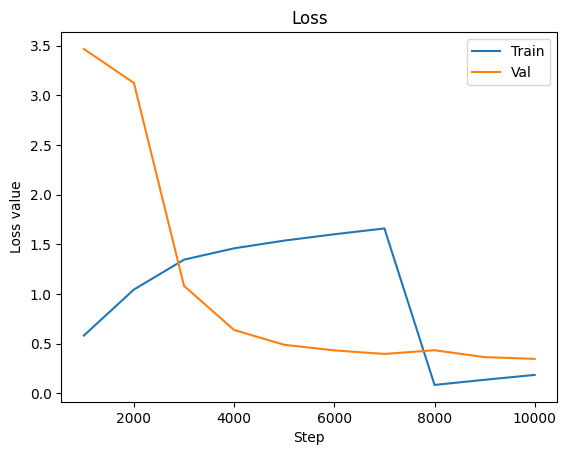

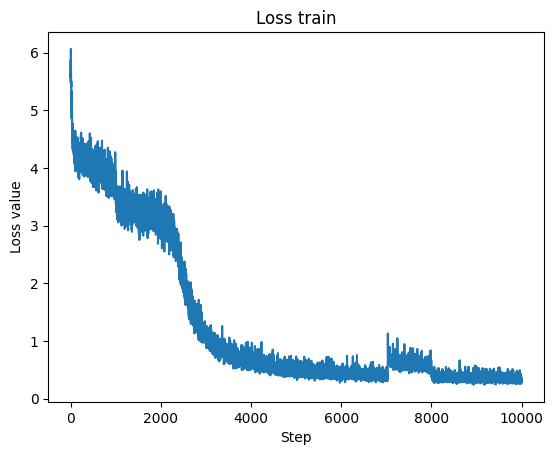

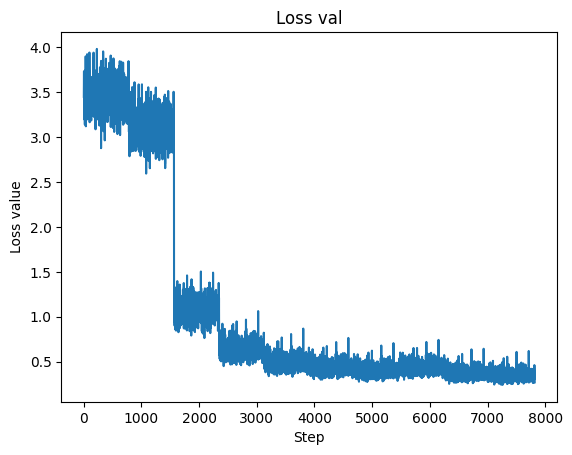

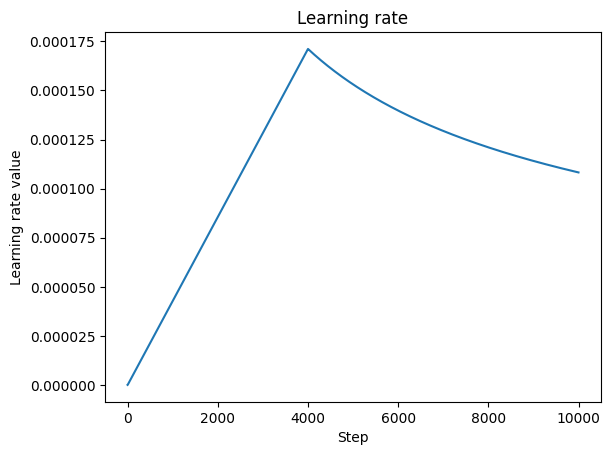

/kaggle/input/8-dataset/tokenizer/tokenizer_src.json
/kaggle/input/1m-mask-vi-and-vi-ds/tokenizer/tokenizer_tgt.json
Read tokenizer successfully
Vocab size src:  25000
Vocab size tgt:  50000
/kaggle/input/8-dataset/tokenizer/tokenizer_src.json
/kaggle/input/1m-mask-vi-and-vi-ds/tokenizer/tokenizer_tgt.json
Read tokenizer successfully
Vocab size src:  25000
Vocab size tgt:  50000
Read dataset successfully
Length train dataset:  225000
Length val dataset:  25000
Length test dataset:  3131
Get dataloader successfully
inputs_embeds.weight
random_encoder.embed_tokens.weight
random_encoder.embed_positions.weight
random_encoder.layers.0.self_attn.k_proj.weight
random_encoder.layers.0.self_attn.k_proj.bias
random_encoder.layers.0.self_attn.v_proj.weight
random_encoder.layers.0.self_attn.v_proj.bias
random_encoder.layers.0.self_attn.q_proj.weight
random_encoder.layers.0.self_attn.q_proj.bias
random_encoder.layers.0.self_attn.out_proj.weight
random_encoder.layers.0.self_attn.out_proj.bias
random

Testing model...:   5%|▍         | 156/3131 [03:35<1:04:58,  1.31s/it]


    SOURCE: cựu tổng thống donna trump
    TARGET: cựu tổng thống donald trump
 PREDICTED: cựu tổng tổng trump
BLEU OF SENTENCE 156
BLEU_1: 0.5841005873035536
BLEU_2: 0.38940039153570244
BLEU_3: 0.0
BLEU_4: 0.0
recall = 0.4000000059604645
precision = 0.4000000059604645
f_05 = 0.3999999165534973


Testing model...:  10%|▉         | 312/3131 [07:04<1:02:45,  1.34s/it]


    SOURCE: chúng nó đóng kiệt thôi
    TARGET: chúng nó đóng kịch thôi
 PREDICTED: chúng nó phải kiệt thôi thôi thôi nó phải thuộc thôi thôi thôi thôi kiệt mặc phải hoàn đóng thôi thôi thôi . . . . . . từ đóng , thôi thôi nghèo không thôi . . . . thiết đóng đóng đóng đóng đóng thôi đóng đóng thôi thôi . . . thiết đóng đóng đóng hoàn đóng đóng đóng thôi thôi . . . . . . . . đóng . đóng đóng nghèo đóng đóng . . . . . . , đóng đóng . thôi .
BLEU OF SENTENCE 312
BLEU_1: 0.04395604506134987
BLEU_2: 0.022099783644080162
BLEU_3: 0.0
BLEU_4: 0.0
recall = 0.032967034727334976
precision = 0.032967034727334976
f_05 = 0.03296695649623871


Testing model...:  15%|█▍        | 468/3131 [10:39<1:00:46,  1.37s/it]


    SOURCE: cách dớt đế nồi xe tay ga , sài lâu bị mòn
    TARGET: cách vớt đế nồi xe tay ga , xài lâu bị mòn
 PREDICTED: cách kim để ngồi xe tay ga , đến lâu bị xe , tay ra ra ra ra , bị bị ngồi xe ở ở , tay cao để ở : xe tay xe tay xe tay ga , cao để , xe ga tay xe xe tay xe , tay ra ra , , , , ngồi xe cao xe tay ngồi , , tay xe , tay để , , , , xe tay để xe tay xe xe
BLEU OF SENTENCE 468
BLEU_1: 0.08641975373029709
BLEU_2: 0.06573422253131866
BLEU_3: 0.04782576858997345
BLEU_4: 0.034413017332553864
recall = 0.08641975373029709
precision = 0.08641975373029709
f_05 = 0.08641967177391052


Testing model...:  20%|█▉        | 624/3131 [14:15<1:01:17,  1.47s/it]


    SOURCE: chứ x mà đầu tư mỡ cơ sở lắp ráp
    TARGET: chứ x mà đầu tư mở cơ sở lắp ráp
 PREDICTED: thứ x mà đầu đầu mỡ cơ cơ lắp và đầu từ từ từ cơ và cơ và lắp . và đầu tư mỡ có , có tự , , đầu đầu đầu đầu đầu đầu đầu từ có tự cơ với lắp và , từ từ từ đầu từ từ cơ , cơ lắp và lắp lắp và lắp lắp . . . . - , . từ , . từ . . . . . . . . . . . . . . . . . . . . . . . . . đóng .
BLEU OF SENTENCE 624
BLEU_1: 0.060606054961681366
BLEU_2: 0.04307304322719574
BLEU_3: 0.02674318291246891
BLEU_4: 0.0
recall = 0.05050504952669144
precision = 0.05050504952669144
f_05 = 0.05050497129559517


Testing model...:  25%|██▍       | 780/3131 [17:57<57:44,  1.47s/it]


    SOURCE: không có tính điềm tỉnh
    TARGET: không có tính điềm tĩnh
 PREDICTED: không không tính ca tỉnh tỉnh tỉnh tỉnh tỉnh tỉnh tỉnh tỉnh tỉnh tỉnh tỉnh không không có - tỉnh tỉnh tỉnh tỉnh tỉnh tỉnh . này có có là tỉnh tỉnh tỉnh tỉnh tỉnh tỉnh tỉnh . này có có có có tỉnh tỉnh tỉnh tỉnh tỉnh tỉnh tỉnh tỉnh tỉnh . có có . , là đạt có đạt . phong tỉnh tỉnh tỉnh tỉnh tỉnh tỉnh . . không có . . . . tỉnh . . . . . . . . . tỉnh . tỉnh tỉnh tỉnh .
BLEU OF SENTENCE 780
BLEU_1: 0.03225806728005409
BLEU_2: 0.01872514747083187
BLEU_3: 0.0
BLEU_4: 0.0
recall = 0.02150537632405758
precision = 0.02150537632405758
f_05 = 0.021505296230316162


Testing model...:  30%|██▉       | 936/3131 [21:31<52:44,  1.44s/it]


    SOURCE: chài đối đáp thơ hay quá xá
    TARGET: chà , đối đáp thơ hay quá xá
 PREDICTED: bà đối đáp thơ hay hay xá cho - hay hay hay hay hay qua . . . . hay hay được hay hay hai . . . . . hay hay được hay hay hay hay hay thuộc hay khám đáp đáp đáp đáp hay hay thơ hay hay hay hay hay thuộc . . . . . và đáp . hay hay hay hay hay hay hay . . . . . . . . . . . . . . . . và đáp đáp . . hay hay hay . . . . hay hay
BLEU OF SENTENCE 936
BLEU_1: 0.05050504580140114
BLEU_2: 0.03932012990117073
BLEU_3: 0.03170754760503769
BLEU_4: 0.024005137383937836
recall = 0.010101010091602802
precision = 0.010101010091602802
f_05 = 0.010100929997861385


Testing model...:  35%|███▍      | 1092/3131 [25:10<48:19,  1.42s/it]


    SOURCE: họ đi nhận đồ từ thiện đợt rầm hay mùng một
    TARGET: họ đi nhận đồ từ thiện đợt rằm hay mùng một
 PREDICTED: họ đi nhận đồ từ đợt đợt rầm hai hai một một . ba một hay đợt rầm một . một . ba . đợt trưng đợt rầm . ở một . một và trả từ chợ đợt rầm hay hay hay hai hay một đóng một từ đóng đồ từ vài đợt đợt trưng & một hay hai hay đóng một . . và . tiền . riêng . hay
BLEU OF SENTENCE 1092
BLEU_1: 0.11267606168985367
BLEU_2: 0.08024108409881592
BLEU_3: 0.06541669368743896
BLEU_4: 0.05356692895293236
recall = 0.09859155118465424
precision = 0.09859155118465424
f_05 = 0.09859146922826767


Testing model...:  40%|███▉      | 1248/3131 [28:51<45:35,  1.45s/it]


    SOURCE: tác giã phân luận về 2 tiếng chuông quá chỉnh
    TARGET: tác giả phân luận về 2 tiếng chuông quá chỉnh
 PREDICTED: tác gia phân luận về 2 và quá quá , luận luận về quá và quá tác phân thuộc luận - luận về 2 2 và , và và phân phân luận thuộc về 2 2 2 2 2 2 quá quá tương quá kết luận phản mẫu về 2 2 2 sau quá quá . kinh quá . quá . . . . giả phân thuộc . kinh chuyên . kinh này . . . . . . . giả . tạo . . phân phân phân . chuyên về 2 2 . . . . tiêu phân
BLEU OF SENTENCE 1248
BLEU_1: 0.07070706784725189
BLEU_2: 0.05372152104973793
BLEU_3: 0.039040759205818176
BLEU_4: 0.028058914467692375
recall = 0.06060606241226196
precision = 0.06060606241226196
f_05 = 0.060605984181165695


Testing model...:  45%|████▍     | 1404/3131 [32:33<42:45,  1.49s/it]


    SOURCE: do sên cam nó cọ sát thôi
    TARGET: do sên cam nó cọ xát thôi
 PREDICTED: do trầm cam nó có sát thôi , hoặc thôi có có có mà có thôi thôi tay bị có tự , có - , thôi sát bản vì nó có tự có lại sát thôi , thôi thôi thôi tội , bị không có có có có lại sát thôi thôi thôi thôi . thôi . rời , bị không - có có có , . thôi . . . . , , tay , , . . . . , , bị có . . . . . . . , hay nó
BLEU OF SENTENCE 1404
BLEU_1: 0.04210526496171951
BLEU_2: 0.021164316684007645
BLEU_3: 0.0
BLEU_4: 0.0
recall = 0.04210526496171951
precision = 0.04210526496171951
f_05 = 0.042105186730623245


Testing model...:  50%|████▉     | 1560/3131 [36:12<34:12,  1.31s/it]


    SOURCE: không đã kích cá nhân
    TARGET: không đả kích cá nhân
 PREDICTED: không không kích cá nhân cá không không không cá cá cá cá cá . , , bị cá cá cá cá cá cá . . cá cá đánh cá cá cá cá cá cá cá . . . , , , là cá kích cá không cá cá cá cá . . , . , , , , là kích cá , cá , cá kích cá . cá . tự . cá cá cá cá cá cá cá cá . . . cá đánh kích cá cá cá . . .
BLEU OF SENTENCE 1560
BLEU_1: 0.04301075637340546
BLEU_2: 0.030578037723898888
BLEU_3: 0.021739985793828964
BLEU_4: 0.0
recall = 0.04301075264811516
precision = 0.04301075264811516
f_05 = 0.04301067441701889


Testing model...:  55%|█████▍    | 1716/3131 [39:48<34:50,  1.48s/it]


    SOURCE: cháu tôi bị đụng xe chết mà đòi mỗ tử thi xét nghiệm
    TARGET: cháu tôi bị đụng xe chết mà đòi mổ tử thi xét nghiệm
 PREDICTED: cháu tôi bị xung xe con mà bị mở tử thì xét xét xét xét thí . - thuộc lấy xét xét mẫu xe . - mà là tay xe chiếc xe hay bị xe - mà - mà - , , bị kế bị thì mẫu xe hay bị , . mà là , từng tử , đội bị bị bị bị bị bị bị sau . . , . - . . - . . . . . . . , . , . , xe . . xe hay chết . . , hay xe
BLEU OF SENTENCE 1716
BLEU_1: 0.08163264393806458
BLEU_2: 0.04102618247270584
BLEU_3: 0.025978662073612213
BLEU_4: 0.0
recall = 0.0714285746216774
precision = 0.0714285746216774
f_05 = 0.07142849266529083


Testing model...:  60%|█████▉    | 1872/3131 [43:16<29:10,  1.39s/it]


    SOURCE: đài của x có khác nhĩ ?
    TARGET: đài của x có khác nhỉ ?
 PREDICTED: đài đài x có khác nhĩ ? ? ? ? ? hay nhĩ ? ? ? ? ? có ? có hay của ? ? ? ? ? ? ? ? có hay có hay ? ? ? ? ? ? ? ? có hay có hay của có ? ? ? ? ? ? ? ? ? . có của có hay có , có , ? khác ? ? . . . . . có . , . . . . . . , có . có . khác khác . . . . . hoặc khác
BLEU OF SENTENCE 1872
BLEU_1: 0.060606054961681366
BLEU_2: 0.03516899421811104
BLEU_3: 0.02336231805384159
BLEU_4: 0.0
recall = 0.05050504952669144
precision = 0.05050504952669144
f_05 = 0.05050497129559517


Testing model...:  65%|██████▍   | 2028/3131 [46:51<26:50,  1.46s/it]


    SOURCE: vẫn giữ được mùi vị đặc chưng của yến
    TARGET: vẫn giữ được mùi vị đặc trưng của yến
 PREDICTED: vẫn giữ được mùi vị đặc nam của yến . và có vị đặc đặt , , . . . hương mùi hương hương hương , . và . . , vị vị vị vị vị vị , , . cho . . . hương mùi , vị có vị đặc hương đặc hay . và . . . . . . . , , , , hương hương hương . . . . . . . . . . . . . . . . . . vị . mùi . hay . . . . , .
BLEU OF SENTENCE 2028
BLEU_1: 0.08080807328224182
BLEU_2: 0.07033798843622208
BLEU_3: 0.058869365602731705
BLEU_4: 0.050249241292476654
recall = 0.08080808073282242
precision = 0.08080808073282242
f_05 = 0.08080799877643585


Testing model...:  70%|██████▉   | 2184/3131 [50:20<16:56,  1.07s/it]


    SOURCE: bạn đọc hướng dẫn mà vẩn không biết cách dùng có thể nhắn
    TARGET: bạn đọc hướng dẫn mà vẫn không biết cách dùng có thể nhắn
 PREDICTED: bạn đọc hướng dẫn mà vẫn không biết cách dùng không đơn vận và không không nói không không không không đơn vận vận vận hay vận và về và mà mà mà mà mà không vận nhưng nhưng nhưng nhưng nhưng nhưng không không không không không không vận không không không không không không không không không cách hướng hướng dẫn dẫn hướng hướng vận không không . cho không . . . và . . . . . . . . . . hướng mà mà dẫn mà mà . . . . hướng là dẫn
BLEU OF SENTENCE 2184
BLEU_1: 0.10101009160280228
BLEU_2: 0.09631425887346268
BLEU_3: 0.09146039187908173
BLEU_4: 0.08642344176769257
recall = 0.10101009905338287
precision = 0.10101009905338287
f_05 = 0.10101001709699631


Testing model...:  75%|███████▍  | 2340/3131 [53:59<19:45,  1.50s/it]


    SOURCE: được hôm bố chở đi choáy phố
    TARGET: được hôm bố chở đi cháy phố
 PREDICTED: được hôm tay chở đi ở phố phố phố tay đi chở đi đi ở hôm ở chở chở chở chở đi đi ở từ đi chở chở chở đi chở đi chở đi đi ở ở từ hôm chở chở chở đi chở đi đi đi . ở từ hôm ngoại đi , đi đi chở chở chở chở đi đi đi . đi đi đi đi chở . đi chở chở chở đi đi đi đi chở chở chở đi đi đi đi đi chở chở đi đi
BLEU OF SENTENCE 2340
BLEU_1: 0.0555555522441864
BLEU_2: 0.03533326834440231
BLEU_3: 0.0
BLEU_4: 0.0
recall = 0.0555555559694767
precision = 0.0555555559694767
f_05 = 0.05555547773838043


Testing model...:  80%|███████▉  | 2496/3131 [57:46<15:38,  1.48s/it]


    SOURCE: nếu giải được bài này thì bạn cũm đỉnh đấy
    TARGET: nếu giải được bài này thì bạn cũng đỉnh đấy
 PREDICTED: nếu giải được bài này bài bài bài chương bài bài bài bài bài bài bài bài . bài bài bài bài bài bài bài bài bài . bài bài bài bài bài bài bài bài bài bài . này đỉnh . giá bài . bài bài bài bài bài bài này nhận này đỉnh . giá thêm . giá . . . . bài bài bài bài này này . . . . . . . . . . . . . . . . bài bài bài bài bài . này . . . bài . bài
BLEU OF SENTENCE 2496
BLEU_1: 0.060606054961681366
BLEU_2: 0.04973646625876427
BLEU_3: 0.04245215654373169
BLEU_4: 0.03553158789873123
recall = 0.05050504952669144
precision = 0.05050504952669144
f_05 = 0.05050497129559517


Testing model...:  85%|████████▍ | 2652/3131 [1:01:31<09:08,  1.14s/it]


    SOURCE: như trưa từng được ăn
    TARGET: như chưa từng được ăn
 PREDICTED: như chưa từng được từng từng chưa từng từng từng từng từng hay từng chưa chưa chưa từng từng từng từng chưa từng . nhiều có từng chưa từng chưa từng từng từng từng từng từng . . chưa chưa chưa chưa từng từng từng từng từng từng từng từng từng từng . chưa từng chưa từng chưa từng từng từng từng từng từng từng từng từng từng . . . . từng . . từng . . , . . . . . . , từng từng từng từng từng . . . . . được có từng
BLEU OF SENTENCE 2652
BLEU_1: 0.04040403664112091
BLEU_2: 0.03516899421811104
BLEU_3: 0.029434675350785255
BLEU_4: 0.022702656686306
recall = 0.04040404036641121
precision = 0.04040404036641121
f_05 = 0.04040396213531494


Testing model...:  90%|████████▉ | 2808/3131 [1:05:16<08:07,  1.51s/it]


    SOURCE: từ một thợ lấp ráp điện đóm , tới kỹ sư hoặc luật sư
    TARGET: từ một thợ lắp ráp điện đóm , tới kỹ sư hoặc luật sư
 PREDICTED: từ một thợ lấp ráp điện , , tới kỹ có điện sư về tới thuật , hay thân sư kỹ , , điện và điện và , , , , , và đóng điện , điện điện , điện , cho tới kỹ vừa kỹ , điện và điện , điện , , , , từng hoa kỹ , hay sư hay sư hay sư , cơ và điện , . . , , hay . . , . . , . . , , . bồi . lắp điện , điện , , . , hay trực
BLEU OF SENTENCE 2808
BLEU_1: 0.1111111044883728
BLEU_2: 0.07529231905937195
BLEU_3: 0.04889373481273651
BLEU_4: 0.0
recall = 0.08080808073282242
precision = 0.08080808073282242
f_05 = 0.08080799877643585


Testing model...:  95%|█████████▍| 2964/3131 [1:08:58<03:40,  1.32s/it]


    SOURCE: khi trở về năm 2007 gặp lại sun được ít hôm thì cả hai cùng phải chết đuổi trong tàu ngầm
    TARGET: khi trở về năm 2007 gặp lại sun được ít hôm thì cả hai cùng phải chết đuối trong tàu ngầm
 PREDICTED: khi trở về năm năm gặp lại và được từ ở thì thì thì thì thì và bị do hay thì thì thì và . phải gặp và , và . ở . hôm năm dẫn lại lại lại nhận lại được từ từ từ ở thì thì thì rồi . ở , gặp lại may lại mất được , hôm ở hôm thì thì thì thì . ở , bị cùng đi , , hôm ở . hôm . hôm vào . , . - . . . năm năm . . . lại . . hôm về
BLEU OF SENTENCE 2964
BLEU_1: 0.1111111044883728
BLEU_2: 0.07529231905937195
BLEU_3: 0.04889373481273651
BLEU_4: 0.0332178920507431
recall = 0.08080808073282242
precision = 0.08080808073282242
f_05 = 0.08080799877643585


Testing model...: 100%|█████████▉| 3120/3131 [1:12:49<00:16,  1.50s/it]


    SOURCE: đang tín mua xe củ về lm lại nghe xong khỏi mua lun
    TARGET: đang tính mua xe cũ về làm lại nghe xong khỏi mua luôn
 PREDICTED: đang tiến mua xe chủ về lại lại lại lại về lại lại mua xong xe xe mua mua mang về chiều mang xe xe mua mang vận xe về về lại lại lại lại hỏi tính xe mua mua lấy về về về lại lại lại lại lại lại lại lại hết tín lấy xe xe xe mua về . cho , . cho từ xe ( chiếc . . . cho xe xe mẫu . . . về về về về . về về
BLEU OF SENTENCE 3120
BLEU_1: 0.09302324801683426
BLEU_2: 0.03308157995343208
BLEU_3: 0.0
BLEU_4: 0.0
recall = 0.058139536529779434
precision = 0.058139536529779434
f_05 = 0.058139458298683167


Testing model...: 100%|██████████| 3131/3131 [1:13:03<00:00,  1.40s/it]


recall = 0.060397177934646606
precision = 0.060397177934646606
f_05 = 0.06039709970355034
     bleu_1    bleu_2    bleu_3    bleu_4    recall  precision      f_05
0  0.077717  0.055849  0.039731  0.028521  0.060397   0.060397  0.060397


In [5]:
train.train(cf)
test.test(cf)

Created:
/kaggle/working/model
/kaggle/working/log
/kaggle/working/log/log_files
/kaggle/input/8-dataset/tokenizer/tokenizer_src.json
/kaggle/input/1m-mask-vi-and-vi-ds/tokenizer/tokenizer_tgt.json
Read tokenizer successfully
Vocab size src:  25000
Vocab size tgt:  50000
/kaggle/input/8-dataset/tokenizer/tokenizer_src.json
/kaggle/input/1m-mask-vi-and-vi-ds/tokenizer/tokenizer_tgt.json
Read tokenizer successfully
Vocab size src:  25000
Vocab size tgt:  50000
Read dataset successfully
Length train dataset:  225000
Length val dataset:  25000
Length test dataset:  3131
Get dataloader successfully
Loaded model from /kaggle/working/model/model_0000010000.pt
/kaggle/input/8-dataset/tokenizer/tokenizer_src.json
/kaggle/input/1m-mask-vi-and-vi-ds/tokenizer/tokenizer_tgt.json
Read tokenizer successfully
Vocab size src:  25000
Vocab size tgt:  50000
Read dataset successfully
Length train dataset:  225000
Length val dataset:  25000
Length test dataset:  3131
Get dataloader successfully


Trainning:   7%|▋         | 499/7032 [05:01<1:05:48,  1.65it/s, loss=0.373, global_step=0000010499]


Saved model at /kaggle/working/model/model_0000010500.pt
Saved config at /kaggle/working/model/config_0000010500.json


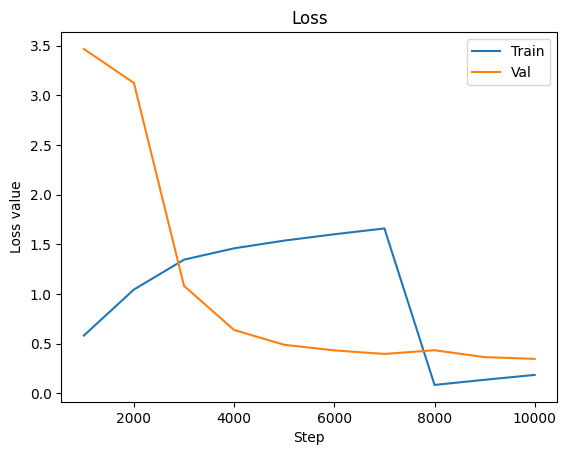

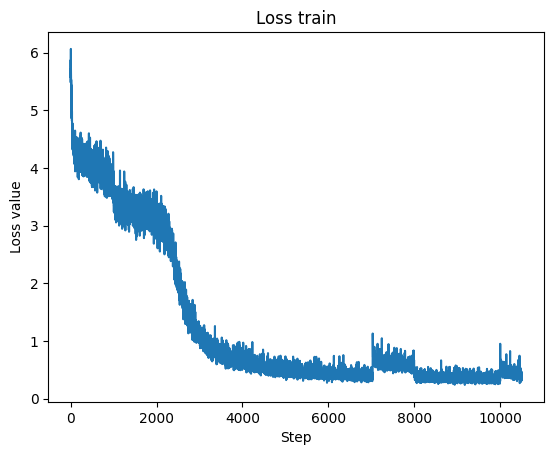

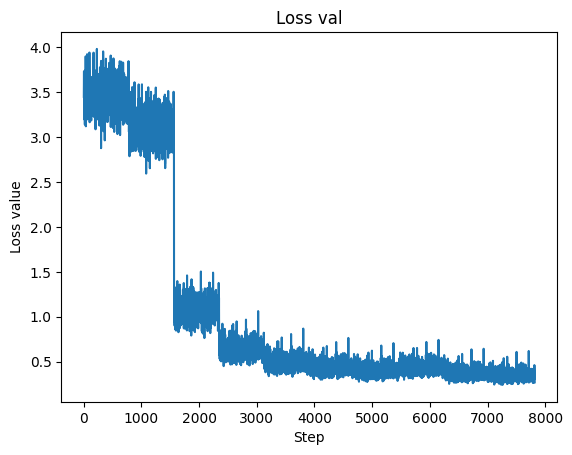

x and y must have same first dimension, but have shapes (10500,) and (500,)
/kaggle/input/8-dataset/tokenizer/tokenizer_src.json
/kaggle/input/1m-mask-vi-and-vi-ds/tokenizer/tokenizer_tgt.json
Read tokenizer successfully
Vocab size src:  25000
Vocab size tgt:  50000
/kaggle/input/8-dataset/tokenizer/tokenizer_src.json
/kaggle/input/1m-mask-vi-and-vi-ds/tokenizer/tokenizer_tgt.json
Read tokenizer successfully
Vocab size src:  25000
Vocab size tgt:  50000
Read dataset successfully
Length train dataset:  225000
Length val dataset:  25000
Length test dataset:  3131
Get dataloader successfully
/kaggle/input/8-dataset/tokenizer/tokenizer_src.json
/kaggle/input/1m-mask-vi-and-vi-ds/tokenizer/tokenizer_tgt.json
Read tokenizer successfully
Vocab size src:  25000
Vocab size tgt:  50000


Testing model...:   5%|▌         | 157/3131 [00:22<08:01,  6.18it/s]


    SOURCE: cựu tổng thống donna trump
    TARGET: cựu tổng thống donald trump
 PREDICTED: cựu tổng thống trump
BLEU OF SENTENCE 156
BLEU_1: 0.7788007830714049
BLEU_2: 0.6358881997427323
BLEU_3: 0.5399903096445087
BLEU_4: 0.0
recall = 0.6000000238418579
precision = 0.6000000238418579
f_05 = 0.5999999642372131


Testing model...:  10%|█         | 314/3131 [00:45<04:50,  9.68it/s]


    SOURCE: chúng nó đóng kiệt thôi
    TARGET: chúng nó đóng kịch thôi
 PREDICTED: chúng nó đóng kiệt thôi
BLEU OF SENTENCE 312
BLEU_1: 0.800000011920929
BLEU_2: 0.6324555277824402
BLEU_3: 0.5108729600906372
BLEU_4: 0.0
recall = 0.800000011920929
precision = 0.800000011920929
f_05 = 0.7999999523162842


Testing model...:  15%|█▍        | 469/3131 [01:11<07:08,  6.21it/s]


    SOURCE: cách dớt đế nồi xe tay ga , sài lâu bị mòn
    TARGET: cách vớt đế nồi xe tay ga , xài lâu bị mòn
 PREDICTED: cách để ngồi xe tay ga , sài lâu bị mòn
BLEU OF SENTENCE 468
BLEU_1: 0.6640732679962068
BLEU_2: 0.5506204543624957
BLEU_3: 0.45189135668840946
BLEU_4: 0.32035587666451387
recall = 0.0833333358168602
precision = 0.0833333358168602
f_05 = 0.08333325386047363


Testing model...:  20%|█▉        | 625/3131 [01:46<05:36,  7.44it/s]


    SOURCE: chứ x mà đầu tư mỡ cơ sở lắp ráp
    TARGET: chứ x mà đầu tư mở cơ sở lắp ráp
 PREDICTED: chứ x mà đầu tư mỡ cơ sở lắp ráp
BLEU OF SENTENCE 624
BLEU_1: 0.8999999761581421
BLEU_2: 0.8366600275039673
BLEU_3: 0.7591472268104553
BLEU_4: 0.658037006855011
recall = 0.8999999761581421
precision = 0.8999999761581421
f_05 = 0.8999999165534973


Testing model...:  25%|██▍       | 781/3131 [02:22<05:20,  7.33it/s]


    SOURCE: không có tính điềm tỉnh
    TARGET: không có tính điềm tĩnh
 PREDICTED: không có tính đạt tỉnh
BLEU OF SENTENCE 780
BLEU_1: 0.6000000238418579
BLEU_2: 0.547722578048706
BLEU_3: 0.4641588628292084
BLEU_4: 0.0
recall = 0.6000000238418579
precision = 0.6000000238418579
f_05 = 0.5999999642372131


Testing model...:  30%|██▉       | 936/3131 [02:54<06:07,  5.98it/s]


    SOURCE: chài đối đáp thơ hay quá xá
    TARGET: chà , đối đáp thơ hay quá xá
 PREDICTED: đối đáp thơ hay quá xá
BLEU OF SENTENCE 936
BLEU_1: 0.7165313105737893
BLEU_2: 0.7165313105737893
BLEU_3: 0.7165313105737893
BLEU_4: 0.7165313105737893
recall = 0.0
precision = 0.0
f_05 = 0.0


Testing model...:  35%|███▍      | 1093/3131 [03:34<04:36,  7.37it/s]


    SOURCE: họ đi nhận đồ từ thiện đợt rầm hay mùng một
    TARGET: họ đi nhận đồ từ thiện đợt rằm hay mùng một
 PREDICTED: họ đi nhận đồ từ thiện đợt rao hay mùng một
BLEU OF SENTENCE 1092
BLEU_1: 0.9090909361839294
BLEU_2: 0.8528028726577759
BLEU_3: 0.785601019859314
BLEU_4: 0.7016879916191101
recall = 0.9090909361839294
precision = 0.9090909361839294
f_05 = 0.9090908765792847


Testing model...:  40%|███▉      | 1248/3131 [04:13<06:11,  5.07it/s]


    SOURCE: tác giã phân luận về 2 tiếng chuông quá chỉnh
    TARGET: tác giả phân luận về 2 tiếng chuông quá chỉnh
 PREDICTED: tác giả phân luận về 2 tiếng chuông quá chính chính chính quá
BLEU OF SENTENCE 1248
BLEU_1: 0.692307710647583
BLEU_2: 0.6793662309646606
BLEU_3: 0.664718508720398
BLEU_4: 0.6479121446609497
recall = 0.692307710647583
precision = 0.692307710647583
f_05 = 0.6923076510429382


Testing model...:  45%|████▍     | 1404/3131 [04:48<04:55,  5.84it/s]


    SOURCE: do sên cam nó cọ sát thôi
    TARGET: do sên cam nó cọ xát thôi
 PREDICTED: do nó nó có sát thôi
BLEU OF SENTENCE 1404
BLEU_1: 0.423240862445307
BLEU_2: 0.0
BLEU_3: 0.0
BLEU_4: 0.0
recall = 0.1428571492433548
precision = 0.1428571492433548
f_05 = 0.14285707473754883


Testing model...:  50%|████▉     | 1561/3131 [05:19<03:05,  8.48it/s]


    SOURCE: không đã kích cá nhân
    TARGET: không đả kích cá nhân
 PREDICTED: không đã kích cá nhân
BLEU OF SENTENCE 1560
BLEU_1: 0.800000011920929
BLEU_2: 0.6324555277824402
BLEU_3: 0.5108729600906372
BLEU_4: 0.0
recall = 0.800000011920929
precision = 0.800000011920929
f_05 = 0.7999999523162842


Testing model...:  55%|█████▍    | 1717/3131 [05:53<03:50,  6.14it/s]


    SOURCE: cháu tôi bị đụng xe chết mà đòi mỗ tử thi xét nghiệm
    TARGET: cháu tôi bị đụng xe chết mà đòi mổ tử thi xét nghiệm
 PREDICTED: cháu tôi bị đụng xe chết mà đòi dây tử thi xét nghiệm
BLEU OF SENTENCE 1716
BLEU_1: 0.9230769276618958
BLEU_2: 0.8770580291748047
BLEU_3: 0.8239824771881104
BLEU_4: 0.7611606121063232
recall = 0.9230769276618958
precision = 0.9230769276618958
f_05 = 0.923076868057251


Testing model...:  60%|█████▉    | 1873/3131 [06:28<02:52,  7.28it/s]


    SOURCE: đài của x có khác nhĩ ?
    TARGET: đài của x có khác nhỉ ?
 PREDICTED: đài của x có khách nhĩ ?
BLEU OF SENTENCE 1872
BLEU_1: 0.7142857313156128
BLEU_2: 0.5976142883300781
BLEU_3: 0.5227579474449158
BLEU_4: 0.43472087383270264
recall = 0.7142857313156128
precision = 0.7142857313156128
f_05 = 0.714285671710968


Testing model...:  65%|██████▍   | 2029/3131 [07:03<02:48,  6.55it/s]


    SOURCE: vẫn giữ được mùi vị đặc chưng của yến
    TARGET: vẫn giữ được mùi vị đặc trưng của yến
 PREDICTED: vẫn giữ giữ mùi vị đặc hộ của yến
BLEU OF SENTENCE 2028
BLEU_1: 0.7777777910232544
BLEU_2: 0.6236095428466797
BLEU_3: 0.3815714120864868
BLEU_4: 0.0
recall = 0.7777777910232544
precision = 0.7777777910232544
f_05 = 0.7777777314186096


Testing model...:  70%|██████▉   | 2184/3131 [07:34<02:49,  5.59it/s]


    SOURCE: bạn đọc hướng dẫn mà vẩn không biết cách dùng có thể nhắn
    TARGET: bạn đọc hướng dẫn mà vẫn không biết cách dùng có thể nhắn
 PREDICTED: bạn đọc hướng hướng mà văn không biết cách dùng có thể nhắn
BLEU OF SENTENCE 2184
BLEU_1: 0.8461538553237915
BLEU_2: 0.7510676383972168
BLEU_3: 0.675106406211853
BLEU_4: 0.5923033356666565
recall = 0.8461538553237915
precision = 0.8461538553237915
f_05 = 0.8461537957191467


Testing model...:  75%|███████▍  | 2341/3131 [08:13<02:33,  5.14it/s]


    SOURCE: được hôm bố chở đi choáy phố
    TARGET: được hôm bố chở đi cháy phố
 PREDICTED: được hôm bố chở đi phố
BLEU OF SENTENCE 2340
BLEU_1: 0.846481724890614
BLEU_2: 0.7571162623611155
BLEU_3: 0.713950336989274
BLEU_4: 0.6731821485847562
recall = 0.7142857313156128
precision = 0.7142857313156128
f_05 = 0.714285671710968


Testing model...:  80%|███████▉  | 2497/3131 [09:03<03:08,  3.36it/s]


    SOURCE: nếu giải được bài này thì bạn cũm đỉnh đấy
    TARGET: nếu giải được bài này thì bạn cũng đỉnh đấy
 PREDICTED: nếu giải được bài này thì bạn đỉnh đỉnh đấy
BLEU OF SENTENCE 2496
BLEU_1: 0.8999999761581421
BLEU_2: 0.8366600275039673
BLEU_3: 0.7591472268104553
BLEU_4: 0.7071067690849304
recall = 0.8999999761581421
precision = 0.8999999761581421
f_05 = 0.8999999165534973


Testing model...:  85%|████████▍ | 2653/3131 [09:45<01:04,  7.43it/s]


    SOURCE: như trưa từng được ăn
    TARGET: như chưa từng được ăn
 PREDICTED: như chưa từng được ăn
BLEU OF SENTENCE 2652
BLEU_1: 1.0
BLEU_2: 1.0
BLEU_3: 1.0
BLEU_4: 1.0
recall = 1.0
precision = 1.0
f_05 = 0.9999999403953552


Testing model...:  90%|████████▉ | 2809/3131 [10:39<01:05,  4.88it/s]


    SOURCE: từ một thợ lấp ráp điện đóm , tới kỹ sư hoặc luật sư
    TARGET: từ một thợ lắp ráp điện đóm , tới kỹ sư hoặc luật sư
 PREDICTED: từ một bồi lấp ráp điện đón , tới kỹ sư hoặc luật sư .
BLEU OF SENTENCE 2808
BLEU_1: 0.7333333492279053
BLEU_2: 0.6473389267921448
BLEU_3: 0.5442060232162476
BLEU_4: 0.4814400374889374
recall = 0.7333333492279053
precision = 0.7333333492279053
f_05 = 0.7333332896232605


Testing model...:  95%|█████████▍| 2964/3131 [11:28<00:37,  4.42it/s]


    SOURCE: khi trở về năm 2007 gặp lại sun được ít hôm thì cả hai cùng phải chết đuổi trong tàu ngầm
    TARGET: khi trở về năm 2007 gặp lại sun được ít hôm thì cả hai cùng phải chết đuối trong tàu ngầm
 PREDICTED: khi trở về năm 2007 gặp lại sun được ít hôm thì cả hai cùng phải chết đuổi trong tàu ngầm
BLEU OF SENTENCE 2964
BLEU_1: 0.9523809552192688
BLEU_2: 0.9258201122283936
BLEU_3: 0.8970291018486023
BLEU_4: 0.8656030893325806
recall = 0.9523809552192688
precision = 0.9523809552192688
f_05 = 0.952380895614624


Testing model...: 100%|█████████▉| 3120/3131 [12:29<00:04,  2.52it/s]


    SOURCE: đang tín mua xe củ về lm lại nghe xong khỏi mua lun
    TARGET: đang tính mua xe cũ về làm lại nghe xong khỏi mua luôn
 PREDICTED: đang tín mua xe củ về lại nghe xong khỏi mua 71830
BLEU OF SENTENCE 3120
BLEU_1: 0.6900333109719925
BLEU_2: 0.5371902201244408
BLEU_3: 0.4302577799788852
BLEU_4: 0.35722810404713035
recall = 0.3076923191547394
precision = 0.3076923191547394
f_05 = 0.3076922297477722


Testing model...: 100%|██████████| 3131/3131 [12:34<00:00,  4.15it/s]


recall = 0.47172781825065613
precision = 0.47172781825065613
f_05 = 0.47172772884368896
     bleu_1    bleu_2    bleu_3    bleu_4    recall  precision      f_05
0  0.571406  0.500501  0.438924  0.385989  0.471728   0.471728  0.471728


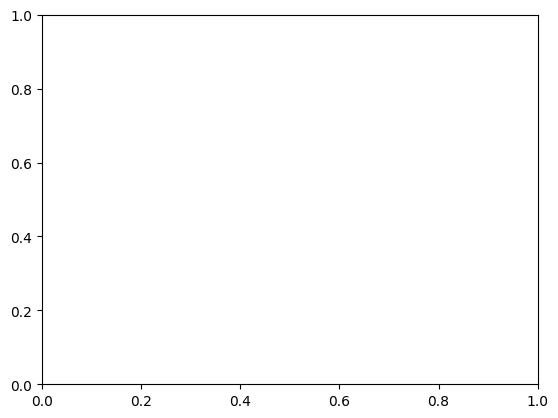

In [6]:
cf["continue_step"] = True
cf["step_train"] = SECOND_STEP
cf["num_steps"] += 500
train.train(cf)
test.test(cf)

Created:
/kaggle/working/model
/kaggle/working/log
/kaggle/working/log/log_files
/kaggle/input/8-dataset/tokenizer/tokenizer_src.json
/kaggle/input/1m-mask-vi-and-vi-ds/tokenizer/tokenizer_tgt.json
Read tokenizer successfully
Vocab size src:  25000
Vocab size tgt:  50000
/kaggle/input/8-dataset/tokenizer/tokenizer_src.json
/kaggle/input/1m-mask-vi-and-vi-ds/tokenizer/tokenizer_tgt.json
Read tokenizer successfully
Vocab size src:  25000
Vocab size tgt:  50000
Read dataset successfully
Length train dataset:  225000
Length val dataset:  25000
Length test dataset:  3131
Get dataloader successfully
Loaded model from /kaggle/working/model/model_0000010500.pt
/kaggle/input/8-dataset/tokenizer/tokenizer_src.json
/kaggle/input/1m-mask-vi-and-vi-ds/tokenizer/tokenizer_tgt.json
Read tokenizer successfully
Vocab size src:  25000
Vocab size tgt:  50000
Read dataset successfully
Length train dataset:  225000
Length val dataset:  25000
Length test dataset:  3131
Get dataloader successfully


Trainning:  21%|██▏       | 1499/7032 [20:00<1:13:50,  1.25it/s, loss=0.300, global_step=0000011999]


Saved model at /kaggle/working/model/model_0000012000.pt
Saved config at /kaggle/working/model/config_0000012000.json


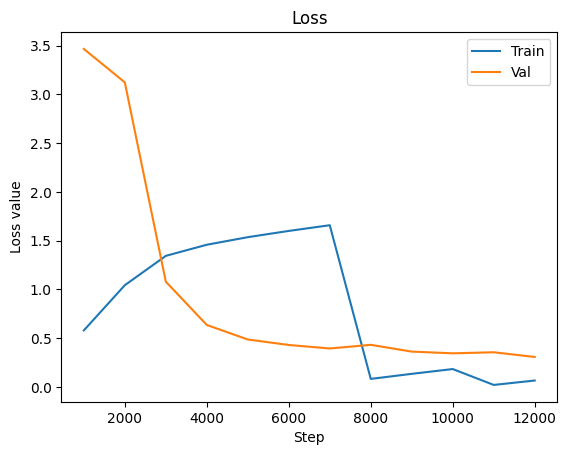

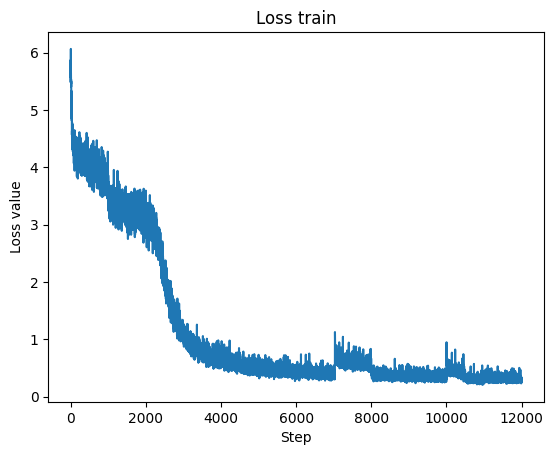

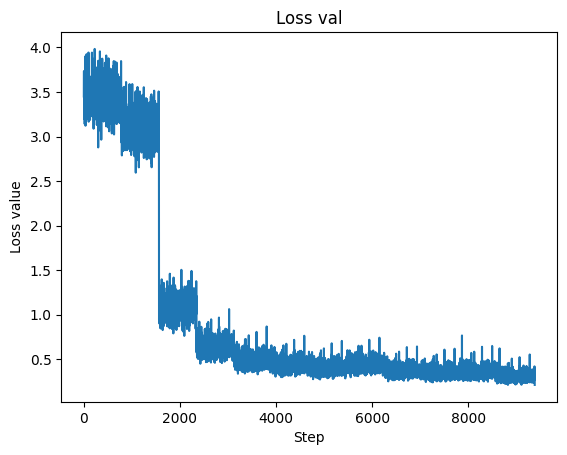

x and y must have same first dimension, but have shapes (12000,) and (1500,)
/kaggle/input/8-dataset/tokenizer/tokenizer_src.json
/kaggle/input/1m-mask-vi-and-vi-ds/tokenizer/tokenizer_tgt.json
Read tokenizer successfully
Vocab size src:  25000
Vocab size tgt:  50000
/kaggle/input/8-dataset/tokenizer/tokenizer_src.json
/kaggle/input/1m-mask-vi-and-vi-ds/tokenizer/tokenizer_tgt.json
Read tokenizer successfully
Vocab size src:  25000
Vocab size tgt:  50000
Read dataset successfully
Length train dataset:  225000
Length val dataset:  25000
Length test dataset:  3131
Get dataloader successfully
/kaggle/input/8-dataset/tokenizer/tokenizer_src.json
/kaggle/input/1m-mask-vi-and-vi-ds/tokenizer/tokenizer_tgt.json
Read tokenizer successfully
Vocab size src:  25000
Vocab size tgt:  50000


Testing model...:   5%|▌         | 157/3131 [00:41<06:50,  7.24it/s]


    SOURCE: cựu tổng thống donna trump
    TARGET: cựu tổng thống donald trump
 PREDICTED: cựu tổng thống trump
BLEU OF SENTENCE 156
BLEU_1: 0.7788007830714049
BLEU_2: 0.6358881997427323
BLEU_3: 0.5399903096445087
BLEU_4: 0.0
recall = 0.6000000238418579
precision = 0.6000000238418579
f_05 = 0.5999999642372131


Testing model...:  10%|▉         | 312/3131 [01:17<11:43,  4.01it/s]


    SOURCE: chúng nó đóng kiệt thôi
    TARGET: chúng nó đóng kịch thôi
 PREDICTED: chúng nó quý kiệt thôi
BLEU OF SENTENCE 312
BLEU_1: 0.6000000238418579
BLEU_2: 0.3872983455657959
BLEU_3: 0.0
BLEU_4: 0.0
recall = 0.6000000238418579
precision = 0.6000000238418579
f_05 = 0.5999999642372131


Testing model...:  15%|█▍        | 469/3131 [02:22<24:44,  1.79it/s]


    SOURCE: cách dớt đế nồi xe tay ga , sài lâu bị mòn
    TARGET: cách vớt đế nồi xe tay ga , xài lâu bị mòn
 PREDICTED: cách không nồi xe tay ga , sài lâu bị mòn . không ra ga , lâu sài khiến bí mòn long cây xe mòn lâu sài lâu ngăn xe mòn long để xe ga , lâu ga lâu sài lâu lâu không cho xe
BLEU OF SENTENCE 468
BLEU_1: 0.19999998807907104
BLEU_2: 0.16514456272125244
BLEU_3: 0.13638710975646973
BLEU_4: 0.10483955591917038
recall = 0.02222222276031971
precision = 0.02222222276031971
f_05 = 0.022222142666578293


Testing model...:  20%|█▉        | 625/3131 [03:41<19:08,  2.18it/s]


    SOURCE: chứ x mà đầu tư mỡ cơ sở lắp ráp
    TARGET: chứ x mà đầu tư mở cơ sở lắp ráp
 PREDICTED: thứ x mà đầu từ mỡ cơ sở lắp ráp cơ sở mỡ mỡ có cơ sở cơ lắp ráp từ x mỡ mỡ mỡ sở má sở cơ lắp ráp ráp ráp mỡ mỡ mỡ cơ cơ sở cơ x ráp ráp ráp ráp ráp ráp mà mỡ ráp cơ x x cơ cơ sở . . ráp ráp . . 3 x x . hạn . cổ sở , cơ sở ráp . ráp . ánh
BLEU OF SENTENCE 624
BLEU_1: 0.08974359929561615
BLEU_2: 0.07633809745311737
BLEU_3: 0.061272189021110535
BLEU_4: 0.04184873774647713
recall = 0.08974359184503555
precision = 0.08974359184503555
f_05 = 0.08974350988864899


Testing model...:  25%|██▍       | 780/3131 [05:00<19:32,  2.01it/s]


    SOURCE: không có tính điềm tỉnh
    TARGET: không có tính điềm tĩnh
 PREDICTED: không có thuộc điềm tỉnh tính tỉnh có không không không tỉnh tỉnh . không không không không là chọn tỉnh có có được hạ tỉnh không không không không ly tỉnh tỉnh có có đạt điểm tỉnh không không có có trọng điềm trung thầy có có tai tỉnh tỉnh
BLEU OF SENTENCE 780
BLEU_1: 0.0784313753247261
BLEU_2: 0.03960590064525604
BLEU_3: 0.0
BLEU_4: 0.0
recall = 0.05882352963089943
precision = 0.05882352963089943
f_05 = 0.05882345139980316


Testing model...:  30%|██▉       | 936/3131 [06:11<14:41,  2.49it/s]


    SOURCE: chài đối đáp thơ hay quá xá
    TARGET: chà , đối đáp thơ hay quá xá
 PREDICTED: dù đối đáp thơ hay quá .
BLEU OF SENTENCE 936
BLEU_1: 0.619198514584401
BLEU_2: 0.5982025857050335
BLEU_3: 0.5709550579925416
BLEU_4: 0.5329462816138187
recall = 0.0
precision = 0.0
f_05 = 0.0


Testing model...:  35%|███▍      | 1093/3131 [07:21<08:48,  3.85it/s]


    SOURCE: họ đi nhận đồ từ thiện đợt rầm hay mùng một
    TARGET: họ đi nhận đồ từ thiện đợt rằm hay mùng một
 PREDICTED: họ đi nhận đồ từ thiện đợt thường hai mùng một
BLEU OF SENTENCE 1092
BLEU_1: 0.8181818127632141
BLEU_2: 0.7567874789237976
BLEU_3: 0.6826924681663513
BLEU_4: 0.6315552592277527
recall = 0.8181818127632141
precision = 0.8181818127632141
f_05 = 0.8181817531585693


Testing model...:  40%|███▉      | 1248/3131 [08:36<13:55,  2.25it/s]


    SOURCE: tác giã phân luận về 2 tiếng chuông quá chỉnh
    TARGET: tác giả phân luận về 2 tiếng chuông quá chỉnh
 PREDICTED: tác gia phân luận về 2 tiếng chuông quá chỉnh quá
BLEU OF SENTENCE 1248
BLEU_1: 0.8181818127632141
BLEU_2: 0.7567874789237976
BLEU_3: 0.7254689931869507
BLEU_4: 0.6989307403564453
recall = 0.8181818127632141
precision = 0.8181818127632141
f_05 = 0.8181817531585693


Testing model...:  45%|████▍     | 1404/3131 [09:53<10:57,  2.63it/s]


    SOURCE: do sên cam nó cọ sát thôi
    TARGET: do sên cam nó cọ xát thôi
 PREDICTED: do luôn chẳng nó có sát thôi
BLEU OF SENTENCE 1404
BLEU_1: 0.4285714328289032
BLEU_2: 0.0
BLEU_3: 0.0
BLEU_4: 0.0
recall = 0.4285714328289032
precision = 0.4285714328289032
f_05 = 0.42857134342193604


Testing model...:  50%|████▉     | 1560/3131 [11:11<08:07,  3.22it/s]


    SOURCE: không đã kích cá nhân
    TARGET: không đả kích cá nhân
 PREDICTED: không không kích cá nhân
BLEU OF SENTENCE 1560
BLEU_1: 0.800000011920929
BLEU_2: 0.6324555277824402
BLEU_3: 0.5108729600906372
BLEU_4: 0.0
recall = 0.800000011920929
precision = 0.800000011920929
f_05 = 0.7999999523162842


Testing model...:  55%|█████▍    | 1716/3131 [12:24<18:58,  1.24it/s]


    SOURCE: cháu tôi bị đụng xe chết mà đòi mỗ tử thi xét nghiệm
    TARGET: cháu tôi bị đụng xe chết mà đòi mổ tử thi xét nghiệm
 PREDICTED: cháu tôi bị đụng xe chết mà đòi mở tử thì xét nghiệm . mà trông mà tôi tử thì thì nghiệm nghiệm mà sắc thì thì khiến tôi đòi kín diện xe nghiệm nghiệm xe mặt mà mà mà đòi mở đòi mở tử xét nghiệm bị được xe . . . mà mà mô được mở mở mở báo xét nghiệm nghiệm .
BLEU OF SENTENCE 1716
BLEU_1: 0.16923077404499054
BLEU_2: 0.1454436033964157
BLEU_3: 0.12629902362823486
BLEU_4: 0.11290017515420914
recall = 0.16923077404499054
precision = 0.16923077404499054
f_05 = 0.16923069953918457


Testing model...:  60%|█████▉    | 1873/3131 [13:39<05:54,  3.55it/s]


    SOURCE: đài của x có khác nhĩ ?
    TARGET: đài của x có khác nhỉ ?
 PREDICTED: đài của x có khách nhĩ ? ? ? ? ? ? không ? ? ? ? .
BLEU OF SENTENCE 1872
BLEU_1: 0.277777761220932
BLEU_2: 0.22140371799468994
BLEU_3: 0.1829896867275238
BLEU_4: 0.14216645061969757
recall = 0.2777777910232544
precision = 0.2777777910232544
f_05 = 0.27777770161628723


Testing model...:  65%|██████▍   | 2029/3131 [14:47<04:45,  3.86it/s]


    SOURCE: vẫn giữ được mùi vị đặc chưng của yến
    TARGET: vẫn giữ được mùi vị đặc trưng của yến
 PREDICTED: vẫn giữ được mùi vị đặc nói của yến
BLEU OF SENTENCE 2028
BLEU_1: 0.8888888955116272
BLEU_2: 0.8164965510368347
BLEU_3: 0.7249202728271484
BLEU_4: 0.660632848739624
recall = 0.8888888955116272
precision = 0.8888888955116272
f_05 = 0.8888888359069824


Testing model...:  70%|██████▉   | 2184/3131 [15:51<02:45,  5.72it/s]


    SOURCE: bạn đọc hướng dẫn mà vẩn không biết cách dùng có thể nhắn
    TARGET: bạn đọc hướng dẫn mà vẫn không biết cách dùng có thể nhắn
 PREDICTED: bạn đọc hướng dẫn mà vân không biết cách dùng có thể vẫn
BLEU OF SENTENCE 2184
BLEU_1: 0.9230769276618958
BLEU_2: 0.8320503234863281
BLEU_3: 0.7609127163887024
BLEU_4: 0.6850836873054504
recall = 0.8461538553237915
precision = 0.8461538553237915
f_05 = 0.8461537957191467


Testing model...:  75%|███████▍  | 2340/3131 [17:09<11:20,  1.16it/s]


    SOURCE: được hôm bố chở đi choáy phố
    TARGET: được hôm bố chở đi cháy phố
 PREDICTED: được hôm bố thở đi phố phố phố phố phố đi đi phố phố phố hôm hôm cho đi hôm phố đi hôm hôm hôm bố chở hôm đi phố phố phố phố . hôm hôm bố phố . hôm đi ở hôm đi ở nói phố .
BLEU OF SENTENCE 2340
BLEU_1: 0.125
BLEU_2: 0.08932369202375412
BLEU_3: 0.07026436924934387
BLEU_4: 0.0
recall = 0.1041666641831398
precision = 0.1041666641831398
f_05 = 0.10416658222675323


Testing model...:  80%|███████▉  | 2497/3131 [18:41<04:39,  2.27it/s]


    SOURCE: nếu giải được bài này thì bạn cũm đỉnh đấy
    TARGET: nếu giải được bài này thì bạn cũng đỉnh đấy
 PREDICTED: nếu giải được đỉnh này thì bạn đỉnh đỉnh đấy
BLEU OF SENTENCE 2496
BLEU_1: 0.800000011920929
BLEU_2: 0.6666666865348816
BLEU_3: 0.48074987530708313
BLEU_4: 0.0
recall = 0.800000011920929
precision = 0.800000011920929
f_05 = 0.7999999523162842


Testing model...:  85%|████████▍ | 2652/3131 [20:04<01:44,  4.59it/s]


    SOURCE: như trưa từng được ăn
    TARGET: như chưa từng được ăn
 PREDICTED: như chưa từng được ăn
BLEU OF SENTENCE 2652
BLEU_1: 1.0
BLEU_2: 1.0
BLEU_3: 1.0
BLEU_4: 1.0
recall = 1.0
precision = 1.0
f_05 = 0.9999999403953552


Testing model...:  90%|████████▉ | 2809/3131 [21:36<02:40,  2.01it/s]


    SOURCE: từ một thợ lấp ráp điện đóm , tới kỹ sư hoặc luật sư
    TARGET: từ một thợ lắp ráp điện đóm , tới kỹ sư hoặc luật sư
 PREDICTED: từ một thợ lấp ráp điện đón , tới kỹ sư hoặc luật sư đón
BLEU OF SENTENCE 2808
BLEU_1: 0.800000011920929
BLEU_2: 0.7171371579170227
BLEU_3: 0.6191617250442505
BLEU_4: 0.5303624868392944
recall = 0.800000011920929
precision = 0.800000011920929
f_05 = 0.7999999523162842


Testing model...:  95%|█████████▍| 2964/3131 [23:06<01:10,  2.37it/s]


    SOURCE: khi trở về năm 2007 gặp lại sun được ít hôm thì cả hai cùng phải chết đuổi trong tàu ngầm
    TARGET: khi trở về năm 2007 gặp lại sun được ít hôm thì cả hai cùng phải chết đuối trong tàu ngầm
 PREDICTED: khi trở về năm hôm gặp lại sung được ít hôm thì cả hai cùng phải chết đuổi trong tàu ngầm
BLEU OF SENTENCE 2964
BLEU_1: 0.8571428656578064
BLEU_2: 0.7745966911315918
BLEU_3: 0.6809771656990051
BLEU_4: 0.5919783115386963
recall = 0.8571428656578064
precision = 0.8571428656578064
f_05 = 0.8571428060531616


Testing model...: 100%|█████████▉| 3120/3131 [24:59<00:06,  1.64it/s]


    SOURCE: đang tín mua xe củ về lm lại nghe xong khỏi mua lun
    TARGET: đang tính mua xe cũ về làm lại nghe xong khỏi mua luôn
 PREDICTED: đang tín mua xe chủ về lại nghe xong khỏi mua quý
BLEU OF SENTENCE 3120
BLEU_1: 0.6900333109719925
BLEU_2: 0.5371902201244408
BLEU_3: 0.4302577799788852
BLEU_4: 0.35722810404713035
recall = 0.3076923191547394
precision = 0.3076923191547394
f_05 = 0.3076922297477722


Testing model...: 100%|██████████| 3131/3131 [25:05<00:00,  2.08it/s]


recall = 0.27163419127464294
precision = 0.27163419127464294
f_05 = 0.2716341018676758
   bleu_1    bleu_2    bleu_3    bleu_4    recall  precision      f_05
0   0.309  0.262959  0.223917  0.190817  0.271634   0.271634  0.271634


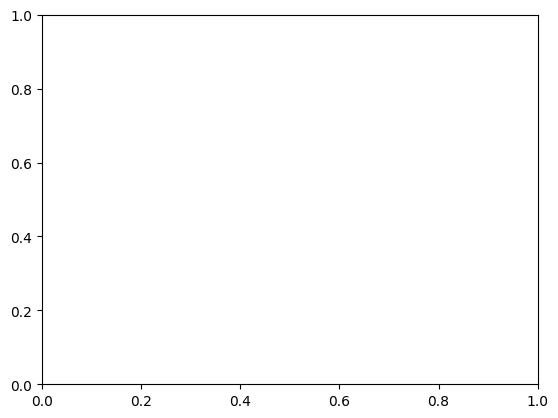

In [7]:
cf["step_train"] = SECOND_STEP
cf["num_steps"] += 1500
train.train(cf)
test.test(cf)